<a href="https://colab.research.google.com/github/shakshi12/RegEx-In-Python/blob/master/fake_news_Politifact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from hatesonar import Sonar
sonar = Sonar()
#sonar.ping(text="At least I'm not a nigger")

C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\shakshi\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\shakshi\Anaconda3\lib\site-packages

In [ ]:
import gensim.corpora as corpora
from pprint import pprint
import os

In [ ]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import text2emotion as te

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shakshi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

In [ ]:
news = pd.read_excel('politifact-health-fact-check.xlsx')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\shakshi\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\shakshi\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [ ]:
news

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rumour-title,rumour-title-href,rumour-source,article-author,article-date,rating-img-src,content,categories,rating
0,Says Wisconsin’s in-person election has caused...,https://www.politifact.com/factchecks/2020/apr...,Facebook posts,Eric Litke,2020-04-21,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Health Care,false
1,"Says Hillary Clinton and Tim Kaine ""want to sh...",https://www.politifact.com/factchecks/2016/sep...,Donald Trump,C. Eugene Emery Jr.,2016-09-25,https://static.politifact.com/politifact/rulin...,NaN,Public Health,half true
2,“Ultraviolet Radiation is administered into th...,https://www.politifact.com/factchecks/2020/apr...,Facebook posts,Daniel Funke,2020-04-28,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Coronavirus,false
3,"""We have a president who wanted to throw 32 mi...",https://www.politifact.com/factchecks/2019/feb...,Bernie Sanders,Jon Greenberg,2019-02-28,https://static.politifact.com/politifact/rulin...,Bernie Sanders has numbers to show Donald Trum...,Health Care,half true
4,High levels of sulfur dioxide in Wuhan “may be...,https://www.politifact.com/factchecks/2020/feb...,Facebook posts,Daniel Funke,2020-02-26,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Public Health,pants on fire (very false)
...,...,...,...,...,...,...,...,...,...
2134,Says Scott Walker's defunding of Planned Paren...,https://www.politifact.com/factchecks/2015/aug...,Hillary Clinton,Tom Kertscher,2015-08-07,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Public Health,half true
2135,"""60 percent of all Americans do not want to se...",https://www.politifact.com/factchecks/2015/oct...,Gwen Moore,Tom Kertscher,2015-10-14,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Health Care,true
2136,"""If we choose Obamacare expansion, 600,000 wil...",https://www.politifact.com/factchecks/2015/apr...,Steve Crisafulli,Joshua Gillin,2015-04-30,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Medicaid,mostly true
2137,"""Under the Affordable Care Act, anyone on Medi...",https://www.politifact.com/factchecks/2015/jun...,Chain email,Louis Jacobson,2015-06-25,https://static.politifact.com/politifact/rulin...,"<img src=""https://static.politifact.com/CACHE/...",Health Care,pants on fire (very false)


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rumour-title       2139 non-null   object        
 1   rumour-title-href  2139 non-null   object        
 2   rumour-source      2139 non-null   object        
 3   article-author     2139 non-null   object        
 4   article-date       2139 non-null   datetime64[ns]
 5   rating-img-src     2139 non-null   object        
 6   content            1902 non-null   object        
 7   categories         2139 non-null   object        
 8   rating             2139 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 150.5+ KB


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_limit = news[[ 'article-date', 'rumour-title', 'content', 'categories', 'rating']]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

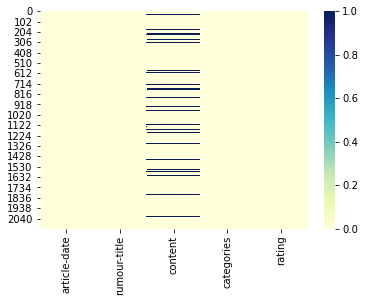

In [ ]:
sns.heatmap(news_limit.isnull(), cbar = True, cmap="YlGnBu")

In [ ]:
news_limit.isnull().sum()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article-date      0
rumour-title      0
content         237
categories        0
rating            0
dtype: int64

In [ ]:
news_limit.dropna(inplace = True)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-12-beab510c2ad5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit.dropna(inplace = True)


In [ ]:
news_limit.isnull().sum()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article-date    0
rumour-title    0
content         0
categories      0
rating          0
dtype: int64

In [ ]:
news_limit.reset_index(drop = True, inplace = True)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_limit['rumour-title'][6]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Wearing masks for the coronavirus “decreases oxygen intake, increases toxin inhalation, shuts down immune system, increases virus risk, scientifically inaccurate, effectiveness not studied.”'

In [ ]:
news_limit.shape

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(1902, 5)

In [ ]:
print(news_limit.categories.nunique())
print(news_limit.categories.unique())

14
['Health Care' 'Coronavirus' 'Public Health' 'Medicare' 'Health Check'
 'North Carolina Healthcare Association' 'Medicaid'
 'Delaware Health and Social Services'
 'SEIU Healthcare Illinois & Indiana' 'The Partnership for Safe Medicines'
 'Colorado Health Institute'
 'Florida Agency for Health Care Administration'
 'Fulton County Health and Wellness' 'Centers for Disease Control']


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
news_limit['content'] = \
news_limit['content'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
news_limit['content'] = \
news_limit['content'].map(lambda x: x.lower())
# Print out the first rows of papers
news_limit['content'].head(10)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-18-b3b4d7ecdfb0>:5: DeprecationWarning: invalid escape sequence \.
  news_limit['content'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-18-b3b4d7ecdfb0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['content'] = \
<ipython-input-18-b3b4d7ecdfb0>:7: Se

0    <img src="https://staticpolitifactcom/cache/im...
1    <img src="https://staticpolitifactcom/cache/im...
2    bernie sanders has numbers to show donald trum...
3    <img src="https://staticpolitifactcom/cache/im...
4    <img src="https://staticpolitifactcom/cache/im...
5    <img src="https://staticpolitifactcom/cache/im...
6    <img src="https://staticpolitifactcom/cache/im...
7    <img src="https://staticpolitifactcom/cache/im...
8    <img src="https://staticpolitifactcom/cache/im...
9    fact-checking how accessible covid-19 tests ar...
Name: content, dtype: object

In [ ]:
# Load the regular expression library
import re
# Remove punctuation
news_limit['rumour-title'] = \
news_limit['rumour-title'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
news_limit['rumour-title'] = \
news_limit['rumour-title'].map(lambda x: x.lower())
# Print out the first rows of papers
news_limit['rumour-title'].head(10)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \.
<>:5: DeprecationWarning: invalid escape sequence \.
<ipython-input-40-2d95c100d829>:5: DeprecationWarning: invalid escape sequence \.
  news_limit['rumour-title'].map(lambda x: re.sub('[,\.!?]', '', x))
<ipython-input-40-2d95c100d829>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title'] = \
<ipython-input-40-2d95c100d

0    says wisconsin’s in-person election has caused...
1    “ultraviolet radiation is administered into th...
2    "we have a president who wanted to throw 32 mi...
3    high levels of sulfur dioxide in wuhan “may be...
4    says gop state sen patrick testin is responsib...
5    obamacare premiums "have gone up 160 percent i...
6    wearing masks for the coronavirus “decreases o...
7    "last year 36 million americans didn’t have a ...
8    says joe biden “has issued more executive fiat...
9    "if you can’t get a test through test iowa the...
Name: rumour-title, dtype: object

In [ ]:
len(news_limit['content'][0])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


412

In [ ]:
news_limit['content'][0]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'<img src="https://staticpolitifactcom/cache/images/politifact/photos/wielexcovid/6541a1e4f81bcb849e6bec99b4270396jpg" class="c-image__original" width="30" height="17" alt="voters observe social distancing guidelines as they wait to vote in milwaukee on april 7 2020  (ap photo/morry gash)" />\n\n\n\n\nvoters observe social distancing guidelines as they wait to vote in milwaukee on april 7 2020 (ap photo/morry gash)'

In [ ]:
def removing_tags(x):
    print("entry:", x)
    if (x[0] == '<'):
        if (x.find('>')):
            index = x.find('>')
            for i in range(0, len(x)):
                if (i <= index):
                    x = x.replace(x[i], ' ', 1)
                    #print("iiii ", x)
            #print("New ", x)
    return x

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_limit['content_noTags'] = news_limit['content'].apply(removing_tags)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


entry: <img src="https://staticpolitifactcom/cache/images/politifact/photos/wielexcovid/6541a1e4f81bcb849e6bec99b4270396jpg" class="c-image__original" width="30" height="17" alt="voters observe social distancing guidelines as they wait to vote in milwaukee on april 7 2020  (ap photo/morry gash)" />




voters observe social distancing guidelines as they wait to vote in milwaukee on april 7 2020 (ap photo/morry gash)
entry: <img src="https://staticpolitifactcom/cache/images/politifact/photos/ap_20098757855421/c1765724ff5b8ad5dae7d3299b1eeeb3jpg" class="c-image__original" width="30" height="17" alt="emergency medical technicians wheel a patient into elmhurst hospital center&#39;s emergency room on april 7 2020 in the queens borough in new york during the current coronavirus outbreak (ap)" />




emergency medical technicians wheel a patient into elmhurst hospital center's emergency room on april 7 2020 in the queens borough in new york during the current coronavirus outbreak (ap)
entry: 

we rate the claim false
entry: <img src="https://staticpolitifactcom/cache/images/politifact/photos/biden_pope/d24ae1b9199745eea9ae769e3dbded81jpg" class="c-image__original" width="30" height="17" alt="pope francis shakes hands with vice president joe biden as he takes part in a congress on the progress of regenerative medicine and its cultural impact at the vatican on april 29 2016 (l’osservatore romano/pool photo via ap)" />




pope francis shakes hands with vice president joe biden as he takes part in a congress on the progress of regenerative medicine and its cultural impact at the vatican on april 29 2016 (l’osservatore romano/pool photo via ap)
entry: <img src="https://staticpolitifactcom/cache/images/politifact/photos/ap_19267584347021/b3f4d3d5cf90b68981b65fa20800cce3jpg" class="c-image__original" width="30" height="17" alt="fox news host laura ingraham speaks during the republican national convention in cleveland on july 20 2016 (ap/terrill)" />




fox news host laura ingraha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

<ipython-input-22-be67fd9fa8c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['content_noTags'] = news_limit['content'].apply(removing_tags)


In [ ]:
news_limit['content_noTags'][2]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'bernie sanders has numbers to show donald trump wanted to cut health care for 32 million\n\n\n\n\nthe first question sen bernie sanders faced in a cnn town hall meeting with voters was what he would do to make sure president donald trump would be defeated sanders began by saying why it was important to unseat trump\n"it\'s not only that we have a president who wanted to throw 32 million people off of the health care they had after promising that he\'d provide health care to everybody" said the vermont independent feb 25 "this president is the first president in the modern history of our country who is trying to divide our people up based on the color of their skin the country they were born in their sexual orientation their gender their religion"\nin this fact-check we examine whether trump wanted 32 million people to lose the health care they had\ntrump has talked about his health care goals in broad sweeping terms at times even contradicting himself but ultimately governing comes do

In [ ]:
news_limit['words_length'] = news_limit['content_noTags'].str.split().str.len()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-83de485c498a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['words_length'] = news_limit['content_noTags'].str.split().str.len()


In [ ]:
news_limit['words_length']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         19
1         29
2       1238
3         24
4         18
        ... 
1897      23
1898      39
1899      28
1900      21
1901      38
Name: words_length, Length: 1902, dtype: int64

In [ ]:
news_limit

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article-date,rumour-title,content,categories,rating,content_noTags,words_length
0,2020-04-21,Says Wisconsin’s in-person election has caused...,"<img src=""https://staticpolitifactcom/cache/im...",Health Care,false,...,19
1,2020-04-28,“Ultraviolet Radiation is administered into th...,"<img src=""https://staticpolitifactcom/cache/im...",Coronavirus,false,...,29
2,2019-02-28,"""We have a president who wanted to throw 32 mi...",bernie sanders has numbers to show donald trum...,Health Care,half true,bernie sanders has numbers to show donald trum...,1238
3,2020-02-26,High levels of sulfur dioxide in Wuhan “may be...,"<img src=""https://staticpolitifactcom/cache/im...",Public Health,pants on fire (very false),...,24
4,2020-05-20,Says GOP state Sen. Patrick Testin is responsi...,"<img src=""https://staticpolitifactcom/cache/im...",Health Care,mostly false,...,18
...,...,...,...,...,...,...,...
1897,2015-08-07,Says Scott Walker's defunding of Planned Paren...,"<img src=""https://staticpolitifactcom/cache/im...",Public Health,half true,...,23
1898,2015-10-14,"""60 percent of all Americans do not want to se...","<img src=""https://staticpolitifactcom/cache/im...",Health Care,true,...,39
1899,2015-04-30,"""If we choose Obamacare expansion, 600,000 wil...","<img src=""https://staticpolitifactcom/cache/im...",Medicaid,mostly true,...,28
1900,2015-06-25,"""Under the Affordable Care Act, anyone on Medi...","<img src=""https://staticpolitifactcom/cache/im...",Health Care,pants on fire (very false),...,21


In [ ]:
news_limit['content_noTags'] = news_limit['content_noTags'].apply(lambda x: x.replace('\n', " "))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-72c88e8bb1c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['content_noTags'] = news_limit['content_noTags'].apply(lambda x: x.replace('\n', " "))


In [ ]:
news_limit['content_noTags'] = news_limit['content_noTags'].apply(lambda x: ' '.join(x.split()))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-28-6557e4ad55f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['content_noTags'] = news_limit['content_noTags'].apply(lambda x: ' '.join(x.split()))


In [ ]:
news_limit['words_length'] = news_limit['content_noTags'].apply(lambda x: len(re.findall(r'\w+', x)))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-f599271a842b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['words_length'] = news_limit['content_noTags'].apply(lambda x: len(re.findall(r'\w+', x)))


In [ ]:
news_limit['words_length'].median()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


32.0

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='words_length', ylabel='Count'>

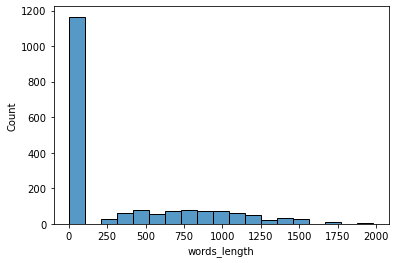

In [ ]:
sns.histplot(news_limit['words_length'])

In [ ]:
news_limit

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article-date,rumour-title,content,categories,rating,content_noTags,words_length
0,2020-04-21,Says Wisconsin’s in-person election has caused...,"<img src=""https://staticpolitifactcom/cache/im...",Health Care,false,voters observe social distancing guidelines as...,20
1,2020-04-28,“Ultraviolet Radiation is administered into th...,"<img src=""https://staticpolitifactcom/cache/im...",Coronavirus,false,emergency medical technicians wheel a patient ...,30
2,2019-02-28,"""We have a president who wanted to throw 32 mi...",bernie sanders has numbers to show donald trum...,Health Care,half true,bernie sanders has numbers to show donald trum...,1269
3,2020-02-26,High levels of sulfur dioxide in Wuhan “may be...,"<img src=""https://staticpolitifactcom/cache/im...",Public Health,pants on fire (very false),in this jan 28 2020 file photo people wearing ...,25
4,2020-05-20,Says GOP state Sen. Patrick Testin is responsi...,"<img src=""https://staticpolitifactcom/cache/im...",Health Care,mostly false,voters cast their ballots in milwaukee amid th...,20
...,...,...,...,...,...,...,...
1897,2015-08-07,Says Scott Walker's defunding of Planned Paren...,"<img src=""https://staticpolitifactcom/cache/im...",Public Health,half true,both hillary clinton and gov scott walker have...,24
1898,2015-10-14,"""60 percent of all Americans do not want to se...","<img src=""https://staticpolitifactcom/cache/im...",Health Care,true,videos showing planned parenthood officials di...,39
1899,2015-04-30,"""If we choose Obamacare expansion, 600,000 wil...","<img src=""https://staticpolitifactcom/cache/im...",Medicaid,mostly true,speaker steve crisafulli right talks with rep ...,29
1900,2015-06-25,"""Under the Affordable Care Act, anyone on Medi...","<img src=""https://staticpolitifactcom/cache/im...",Health Care,pants on fire (very false),dr murray shames center a vascular surgeon imp...,21


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


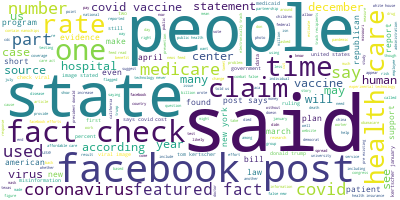

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(news_limit['content_noTags'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop = stopwords.words('english')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

news_limit['rumour-title_clean'] = np.vectorize(remove_pattern)(news_limit['rumour-title'], "@[\w]*")

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:7: DeprecationWarning: invalid escape sequence \w
<>:7: DeprecationWarning: invalid escape sequence \w
<ipython-input-168-efffa42112d6>:7: DeprecationWarning: invalid escape sequence \w
  news_limit['rumour-title_clean'] = np.vectorize(remove_pattern)(news_limit['rumour-title'], "@[\w]*")
<ipython-input-168-efffa42112d6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-ti

In [ ]:
# tokenization
#news_limit['rumour-title_tokens'] = nltk.word_tokenize(str(news_limit['rumour-title']))
#news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].apply(lambda x: x.split())
#news_limit['rumour-title_tokens']  = news_limit['rumour-title'].apply(lambda x: nltk.word_tokenize(str(news_limit['rumour-title'])))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-108-3b18aa529f31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].apply(lambda x: x.split())


In [ ]:
# removing non words
news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].str.replace("[^a-zA-Z#]", " ")

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-169-0aab5de6c569>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
# tokenize
news_limit['rumour-title_clean'] =  news_limit['rumour-title_clean'].apply(lambda x: x.split())

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-170-41ae8641d3b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title_clean'] =  news_limit['rumour-title_clean'].apply(lambda x: x.split())


In [ ]:
news_limit['rumour-title_clean']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [says, wisconsin, s, in, person, election, has...
1       [ultraviolet, radiation, is, administered, int...
2       [we, have, a, president, who, wanted, to, thro...
3       [high, levels, of, sulfur, dioxide, in, wuhan,...
4       [says, gop, state, sen, patrick, testin, is, r...
                              ...                        
1897    [says, scott, walker, s, defunding, of, planne...
1898    [percent, of, all, americans, do, not, want, t...
1899    [if, we, choose, obamacare, expansion, will, l...
1900    [under, the, affordable, care, act, anyone, on...
1901    [ron, johnson, said, specifically, that, he, h...
Name: rumour-title_clean, Length: 1902, dtype: object

In [ ]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-172-e84c649a5ee8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [ ]:
news_limit['rumour-title_clean']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       [say, wisconsin, s, in, person, elect, ha, cau...
1       [ultraviolet, radiat, is, administ, into, the,...
2       [we, have, a, presid, who, want, to, throw, mi...
3       [high, level, of, sulfur, dioxid, in, wuhan, m...
4       [say, gop, state, sen, patrick, testin, is, re...
                              ...                        
1897    [say, scott, walker, s, defund, of, plan, pare...
1898    [percent, of, all, american, do, not, want, to...
1899    [if, we, choos, obamacar, expans, will, lose, ...
1900    [under, the, afford, care, act, anyon, on, med...
1901    [ron, johnson, said, specif, that, he, hope, t...
Name: rumour-title_clean, Length: 1902, dtype: object

In [ ]:
# convert list to string
news_limit['rumour-title_clean'] = [','.join(map(str, l)) for l in news_limit['rumour-title_clean']]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-174-5620f958cab5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title_clean'] = [','.join(map(str, l)) for l in news_limit['rumour-title_clean']]


In [ ]:
news_limit['rumour-title_clean']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       say,wisconsin,s,in,person,elect,ha,caus,a,surg...
1       ultraviolet,radiat,is,administ,into,the,bodi,a...
2       we,have,a,presid,who,want,to,throw,million,peo...
3       high,level,of,sulfur,dioxid,in,wuhan,may,be,a,...
4       say,gop,state,sen,patrick,testin,is,respons,fo...
                              ...                        
1897    say,scott,walker,s,defund,of,plan,parenthood,l...
1898    percent,of,all,american,do,not,want,to,see,pla...
1899    if,we,choos,obamacar,expans,will,lose,elig,for...
1900    under,the,afford,care,act,anyon,on,medicar,who...
1901    ron,johnson,said,specif,that,he,hope,the,first...
Name: rumour-title_clean, Length: 1902, dtype: object

In [ ]:
# remove less than 3 or equal to words
three = news_limit['rumour-title_clean'].apply(lambda x: ' '.join([w for w in x.split(',') if len(w) <= 3]))
news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].apply(lambda x: ' '.join([w for w in str(x).split(',') if len(w) > 3]))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-180-b035d42639ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['rumour-title_clean'] = news_limit['rumour-title_clean'].apply(lambda x: ' '.join([w for w in str(x).split(',') if len(w) > 3]))


In [ ]:
three

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0                                    say s in ha a in new
1             is the as a to and and thi ha use for a now
2                              we a who to off of the had
3                             of in may be a of of of the
4                 say gop sen is for m in he to do hi job
                              ...                        
1897                          say s of the els to for and
1898                                 of all do not to see
1899                                      if we for of be
1900    the act on who is to a for be for the won t pay a
1901                                    ron he the to the
Name: rumour-title_clean, Length: 1902, dtype: object

In [ ]:
three.to_csv('three_list.csv')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_limit['rumour-title_clean']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        wisconsin person elect caus surg coronaviru case
1       ultraviolet radiat administ into bodi disinfec...
2       have presid want throw million peopl health ca...
3       high level sulfur dioxid wuhan sign mass crema...
4       state patrick testin respons lost feder fund b...
                              ...                        
1897    scott walker defund plan parenthood left women...
1898         percent american want plan parenthood defund
1899    choos obamacar expans will lose elig their sub...
1900    under afford care anyon medicar admit hospit o...
1901    johnson said specif that hope first step occur...
Name: rumour-title_clean, Length: 1902, dtype: object

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


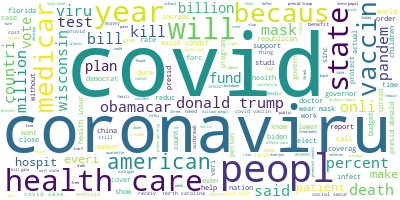

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(news_limit['rumour-title_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


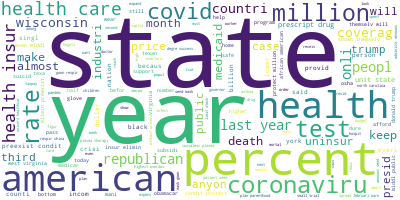

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(news_limit.loc[news_limit['rating'] == 'true ']['rumour-title_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


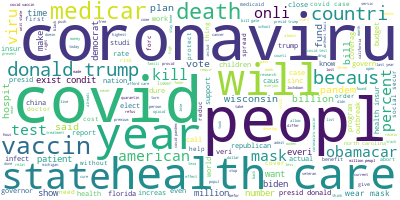

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(news_limit.loc[news_limit['rating'] != 'true ']['rumour-title_clean'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=7, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = news_limit['content_noTags'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['voters', 'observe', 'social', 'distancing', 'guidelines', 'wait', 'vote', 'milwaukee', 'april', 'ap', 'photo', 'morry', 'gash']


In [ ]:
data = news_limit.loc[news_limit['rating'] == 'true ']['content_noTags'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['democratic', 'presidential', 'candidate', 'sen', 'elizabeth', 'warren', 'mass', 'right', 'speaks', 'south', 'bend', 'mayor', 'pete', 'buttigieg', 'listens', 'democratic', 'presidential', 'primary', 'debate', 'thursday', 'dec', 'los', 'angeles', 'ap']


In [ ]:
data = news_limit.loc[news_limit['rating'] != 'true ']['content_noTags'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['voters', 'observe', 'social', 'distancing', 'guidelines', 'wait', 'vote', 'milwaukee', 'april', 'ap', 'photo', 'morry', 'gash']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]


In [ ]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.012*"covid" + 0.009*"said" + 0.008*"facebook" + 0.007*"post" + '
  '0.006*"check" + 0.006*"people" + 0.006*"health" + 0.006*"coronavirus" + '
  '0.006*"news" + 0.005*"fact"'),
 (1,
  '0.009*"covid" + 0.007*"said" + 0.007*"would" + 0.007*"coronavirus" + '
  '0.007*"health" + 0.007*"people" + 0.006*"facebook" + 0.006*"fact" + '
  '0.005*"care" + 0.005*"post"'),
 (2,
  '0.011*"health" + 0.011*"said" + 0.006*"would" + 0.006*"people" + '
  '0.005*"care" + 0.005*"medicare" + 0.004*"covid" + 0.004*"states" + '
  '0.004*"insurance" + 0.004*"us"'),
 (3,
  '0.015*"health" + 0.009*"people" + 0.008*"said" + 0.008*"covid" + '
  '0.007*"facebook" + 0.006*"would" + 0.006*"care" + 0.005*"news" + '
  '0.005*"post" + 0.004*"claim"'),
 (4,
  '0.011*"said" + 0.009*"health" + 0.009*"would" + 0.006*"people" + '
  '0.005*"post" + 0.005*"medicare" + 0.005*"covid" + 0.005*"coronavirus" + '
  '0.004*"us" + 0.004*"fact"'),
 (5,
  '0.009*"post" + 0.008*"said" + 0.008*"health" + 0.006*"facebook" + '
  '0

In [ ]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.014*"health" + 0.008*"said" + 0.007*"people" + 0.006*"would" + '
  '0.005*"state" + 0.005*"covid" + 0.005*"trump" + 0.004*"claim" + 0.004*"us" '
  '+ 0.004*"coronavirus"'),
 (1,
  '0.014*"health" + 0.010*"said" + 0.009*"care" + 0.007*"people" + '
  '0.006*"facebook" + 0.006*"would" + 0.005*"us" + 0.005*"president" + '
  '0.004*"fact" + 0.004*"coronavirus"'),
 (2,
  '0.010*"facebook" + 0.009*"health" + 0.008*"covid" + 0.007*"said" + '
  '0.007*"post" + 0.006*"coronavirus" + 0.005*"people" + 0.005*"fact" + '
  '0.005*"care" + 0.005*"would"'),
 (3,
  '0.014*"said" + 0.010*"health" + 0.008*"would" + 0.007*"covid" + '
  '0.006*"people" + 0.005*"facebook" + 0.005*"care" + 0.005*"post" + '
  '0.004*"state" + 0.004*"medicare"'),
 (4,
  '0.010*"said" + 0.009*"facebook" + 0.007*"health" + 0.007*"people" + '
  '0.006*"post" + 0.006*"fact" + 0.006*"covid" + 0.006*"coronavirus" + '
  '0.005*"would" + 0.004*"says"'),
 (5,
  '0.010*"said" + 0.009*"people" + 0.008*"health" + 0.007*"facebook"

In [ ]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*"said" + 0.010*"facebook" + 0.009*"coronavirus" + 0.009*"health" + '
  '0.008*"post" + 0.007*"people" + 0.007*"trump" + 0.005*"news" + 0.005*"fact" '
  '+ 0.005*"check"'),
 (1,
  '0.011*"health" + 0.008*"said" + 0.007*"people" + 0.006*"would" + '
  '0.006*"covid" + 0.005*"coronavirus" + 0.005*"care" + 0.004*"one" + '
  '0.004*"medicare" + 0.004*"fact"'),
 (2,
  '0.010*"facebook" + 0.008*"post" + 0.007*"said" + 0.007*"people" + '
  '0.007*"covid" + 0.006*"news" + 0.005*"health" + 0.005*"fact" + 0.005*"also" '
  '+ 0.004*"coronavirus"'),
 (3,
  '0.013*"said" + 0.010*"health" + 0.009*"covid" + 0.007*"would" + '
  '0.006*"people" + 0.006*"facebook" + 0.005*"medicare" + 0.005*"care" + '
  '0.005*"post" + 0.005*"state"'),
 (4,
  '0.014*"health" + 0.009*"said" + 0.006*"post" + 0.005*"would" + '
  '0.005*"people" + 0.005*"facebook" + 0.004*"covid" + 0.004*"fact" + '
  '0.004*"state" + 0.004*"news"'),
 (5,
  '0.011*"said" + 0.010*"people" + 0.008*"post" + 0.008*"facebook" + '
  '0

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


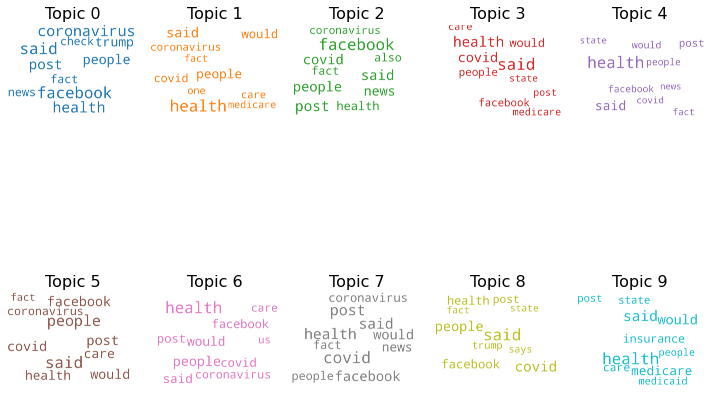

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


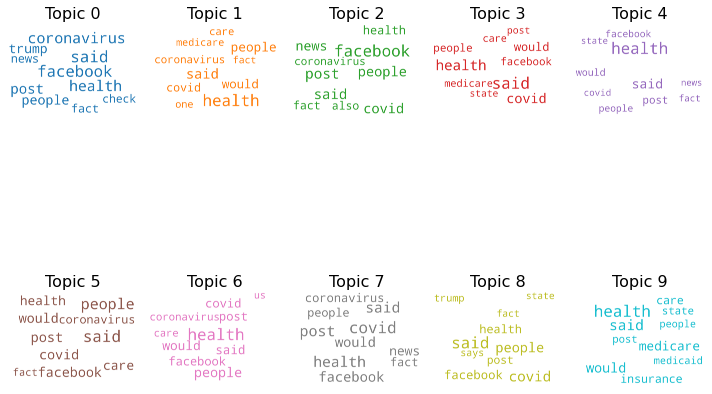

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


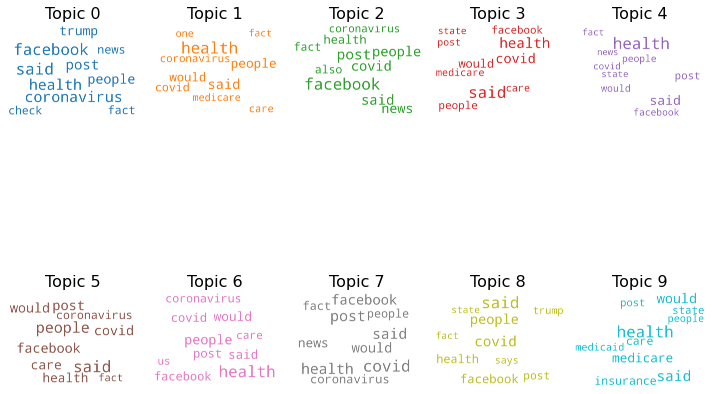

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5 , figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## find clickbait urls

In [ ]:
def Find(URL): 
  
    # findall() has been used  
    # with valid conditions for urls in string 
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex, URL)       
    return [x[0] for x in url]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_limit['urls'] = news_limit['content_noTags'].apply(Find)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-204-daa685235a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['urls'] = news_limit['content_noTags'].apply(Find)


In [ ]:
news_limit['urls'] = news_limit['urls'].apply(lambda x: np.nan if not x else x)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-205-89903e35520f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['urls'] = news_limit['urls'].apply(lambda x: np.nan if not x else x)


In [ ]:
# 83 rows has urls
news_limit.isnull().sum()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article-date              0
rumour-title              0
content                   0
categories                0
rating                    0
content_noTags            0
words_length              0
clean_rumour-title        0
rumour-title_tokens       0
rumour-title_clean        0
urls                   1819
dtype: int64

In [ ]:
news_limit[news_limit['urls'].notnull()]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,article-date,rumour-title,content,categories,rating,content_noTags,words_length,clean_rumour-title,rumour-title_tokens,rumour-title_clean,urls
2,2019-02-28,"""we have a president who wanted to throw 32 mi...",bernie sanders has numbers to show donald trum...,Health Care,half true,bernie sanders has numbers to show donald trum...,1269,have president wanted throw million people hea...,"['""', 'w', 'e', ' ', 'h', 'v', 'e', ' ', ' ', ...",have presid want throw million peopl health ca...,[https://wwwsharethefactsco/share/007497bf-70d...
34,2018-06-25,says republican gubernatorial candidate adam l...,ad falsely accuses nevada's gop governor candi...,Health Care,false,ad falsely accuses nevada's gop governor candi...,834,Says Republican gubernatorial candidate Adam L...,"[' ', 'r', 'e', 'p', 'u', 'b', 'l', 'c', 'n', ...",republican gubernatori candid adam laxalt deal...,[https://wwwsharethefactsco/share/f2e6d685-01f...
84,2019-03-21,"""farmer suicide rates are as high as they have...",farmer suicides as high as in the great depres...,Public Health,false,farmer suicides as high as in the great depres...,883,"""Farmer suicide rates high they have been sinc...","['""', 'f', 'r', 'e', 'r', ' ', 'u', 'c', 'e', ...",farmer suicid rate high they have been sinc gr...,[https://wwwsharethefactsco/share/1babbe1e-391...
90,2018-12-03,"""$21t in pentagon accounting errors medicare f...",alexandria ocasio-cortez wrong on scale of pen...,Health Care,false,alexandria ocasio-cortez wrong on scale of pen...,1157,"""$21T Pentagon accounting errors. Medicare cos...","['""', '$', '2', '1', ' ', 'n', ' ', 'p', 'e', ...",pentagon account error medicar cost that mean ...,"[https://tco/sot6gsmdsg—, https://wwwsharethef..."
92,2016-11-14,"margaret sanger ""wanted a black christian lead...",pat robertson absurdly says sanger king conspi...,Public Health,pants on fire (very false),pat robertson absurdly says sanger king conspi...,1099,"Margaret Sanger ""wanted black Christian leader...","['r', 'g', 'r', 'e', ' ', 'n', 'g', 'e', 'r', ...",margaret sanger want black christian leader li...,[https://wwwsharethefactsco/share/081fdb98-3c1...
...,...,...,...,...,...,...,...,...,...,...,...
1717,2019-03-06,"says president donald trump ""came forth with a...",bernie sanders attacks donald trump over propo...,Medicare,half true,bernie sanders attacks donald trump over propo...,1107,"Says President Donald Trump ""came forth with b...","[' ', 'p', 'r', 'e', 'e', 'n', ' ', 'n', 'l', ...",presid donald trump came forth with budget tri...,[https://wwwsharethefactsco/share/a83a24e6-616...
1737,2018-12-03,"""$21t in pentagon accounting errors medicare f...",alexandria ocasio-cortez wrong on scale of pen...,Medicare,false,alexandria ocasio-cortez wrong on scale of pen...,1157,"""$21T Pentagon accounting errors. Medicare cos...","['""', '$', '2', '1', ' ', 'n', ' ', 'p', 'e', ...",pentagon account error medicar cost that mean ...,"[https://tco/sot6gsmdsg—, https://wwwsharethef..."
1743,2018-05-15,"says joe manchin displayed an ""unwillingness t...",patrick morrisey says joe manchin won't budge ...,Health Care,half true,patrick morrisey says joe manchin won't budge ...,951,"Says Manchin displayed ""unwillingness change f...","['\xa0', 'j', 'e', ' ', 'n', 'c', 'h', 'n', ' ...",manchin display unwilling chang fail obamacar,[https://wwwsharethefactsco/share/75c0761d-a79...
1762,2018-09-18,"says 3000 people ""did not die"" in two hurrican...",donald trump wrong about puerto rico death tol...,Health Care,false,donald trump wrong about puerto rico death tol...,1474,"Says 3,000 people ""did die"" hurricanes that Pu...","[' ', '3', '0', '0', '0', ' ', 'p', 'e', 'p', ...",peopl hurrican that puerto rico that death tol...,[https://wwwsharethefactsco/share/8cc83597-0b0...


In [ ]:
# same urls and all points to politifact site
news_limit['urls'][90]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['https://tco/sot6gsmdsg—',
 'https://wwwsharethefactsco/share/ae60a420-db9b-4d1f-bf6d-5d2bd1a1e9a2']

## Emotion Detection (Happy, Angry, Sad, Surprise, and Fear)

In [ ]:
news_limit['emotions'] = news_limit['content_noTags'].apply(lambda text: te.get_emotion(text))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-209-66d1ee9dc2ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['emotions'] = news_limit['content_noTags'].apply(lambda text: te.get_emotion(text))


In [ ]:
news_limit['emotions_rumortitle'] = news_limit['rumour-title_clean'].apply(lambda text: te.get_emotion(text))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-210-fddb847ad5a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['emotions_rumortitle'] = news_limit['rumour-title_clean'].apply(lambda text: te.get_emotion(text))


In [ ]:
news_limit['emotions_rumortitle'][0]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}

In [ ]:
news_limit['emotions'][0]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.0, 'Fear': 0.5}

In [ ]:
def emotions(x):
    b = 'null'
    m = max(x['Happy'], x['Angry'], x['Surprise'], x['Sad'], x['Fear'])
    if (m == x['Happy']):
        a = 'Happy'  
    elif (m == x['Angry']):
        a = 'Angry'
    elif (m == x['Surprise']):
        a = 'Surprise'
    elif (m == x['Sad']):
        a = 'Sad'
    elif (m == x['Fear']):
        a = 'Fear'
    if (m == 0.50 or m == 0.5):
        if (x['Happy'] == 0.50 or x['Happy'] == 0.5):
            if (a != 'Happy'):
                b = 'Happy'
        if (x['Angry'] == 0.50 or x['Angry'] == 0.5):
             if (a != 'Angry'):
                b = 'Angry'
        if (x['Surprise'] == 0.50 or x['Surprise'] == 0.5):
             if (a != 'Surprise'):
                b = 'Surprise'
        if (x['Sad'] == 0.50 or x['Sad'] == 0.5):
             if (a != 'Sad'):
                b = 'Sad'
        if (x['Fear'] == 0.50 or x['Fear'] == 0.5):
             if (a != 'Fear'):
                b = 'Fear'
    if (b != 'null' and a != b):
        a = a + b
    return a

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def emotions(x):
    b = 'null'
    m = max(x['Happy'], x['Angry'], x['Surprise'], x['Sad'], x['Fear'])
    if (m == x['Happy']):
        a = 'Happy'  
    elif (m == x['Angry']):
        a = 'Angry'
    elif (m == x['Surprise']):
        a = 'Surprise'
    elif (m == x['Sad']):
        a = 'Sad'
    elif (m == x['Fear']):
        a = 'Fear'
    return a

In [ ]:
news_limit['emotions_title_class'] = news_limit['emotions_rumortitle'].apply(emotions)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-214-a9762ceec318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['emotions_title_class'] = news_limit['emotions_rumortitle'].apply(emotions)


In [ ]:
news_limit['emotions_title_class']

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0             Happy
1          Surprise
2             Happy
3              Fear
4               Sad
           ...     
1897    SurpriseSad
1898          Happy
1899          Happy
1900        SadFear
1901       Surprise
Name: emotions_title_class, Length: 1902, dtype: object

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


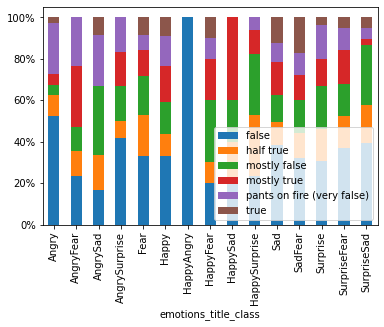

In [ ]:
news_limit.groupby(by = ['emotions_title_class', 'rating']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 4)
plt.show()

In [ ]:
news_limit[news_limit['emotions_title_class'] == 'SurpriseSad'].count()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


article-date            38
rumour-title            38
content                 38
categories              38
rating                  38
content_noTags          38
words_length            38
clean_rumour-title      38
rumour-title_tokens     38
rumour-title_clean      38
urls                     1
emotions                38
emotions_rumortitle     38
emotions_title_class    38
dtype: int64

In [ ]:
news_limit['emotions_title_class'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fear             514
Happy            490
Surprise         284
Sad              219
SurpriseFear     122
SadFear          100
Angry             40
SurpriseSad       38
HappyFear         20
HappySurprise     17
AngryFear         17
HappySad          15
AngrySurprise     12
AngrySad          12
HappyAngry         2
Name: emotions_title_class, dtype: int64

In [ ]:
news_limit['emotions_title_class'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fear             514
Happy            490
Surprise         284
Sad              219
SurpriseFear     122
SadFear          100
Angry             40
SurpriseSad       38
HappyFear         20
HappySurprise     17
AngryFear         17
HappySad          15
AngrySurprise     12
AngrySad          12
HappyAngry         2
Name: emotions_title_class, dtype: int64

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


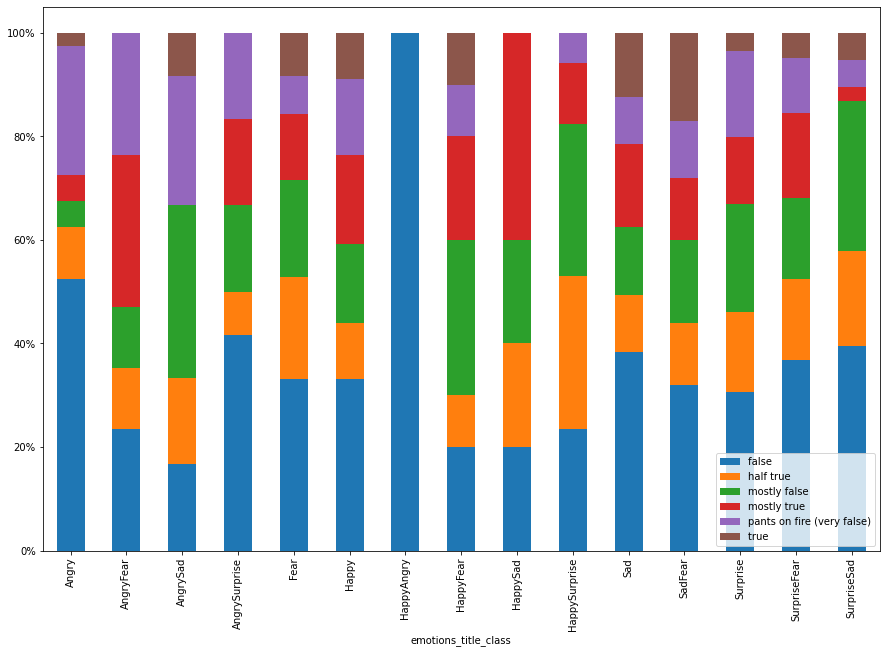

In [ ]:
news_limit.groupby(by = ['emotions_title_class', 'rating']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc = 4)
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


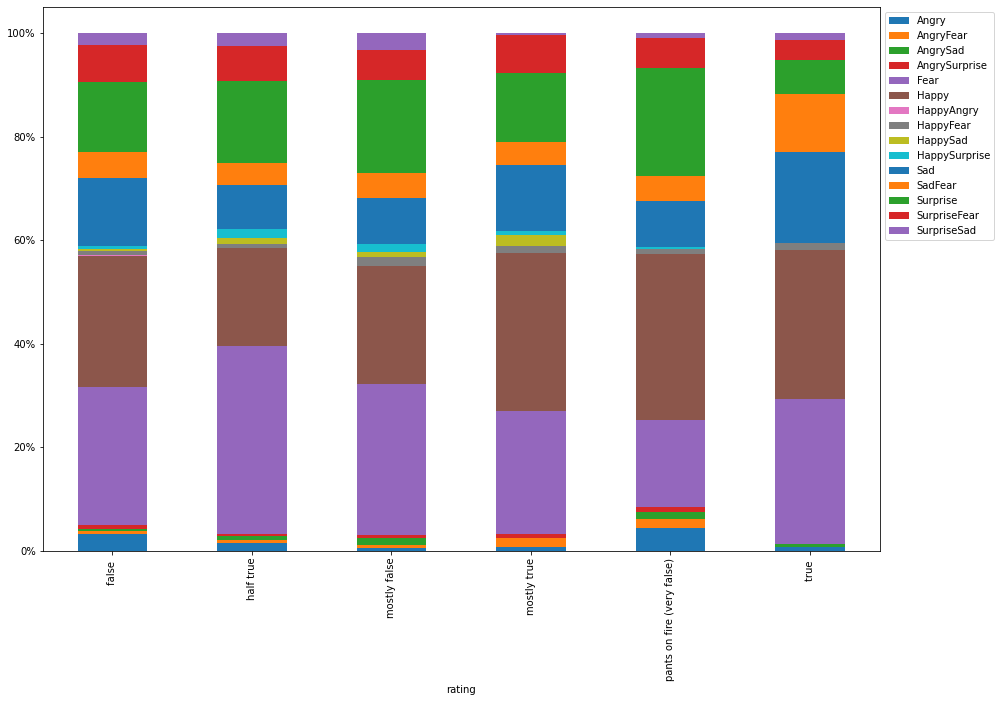

In [ ]:
news_limit.groupby(by = [ 'rating', 'emotions_title_class']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


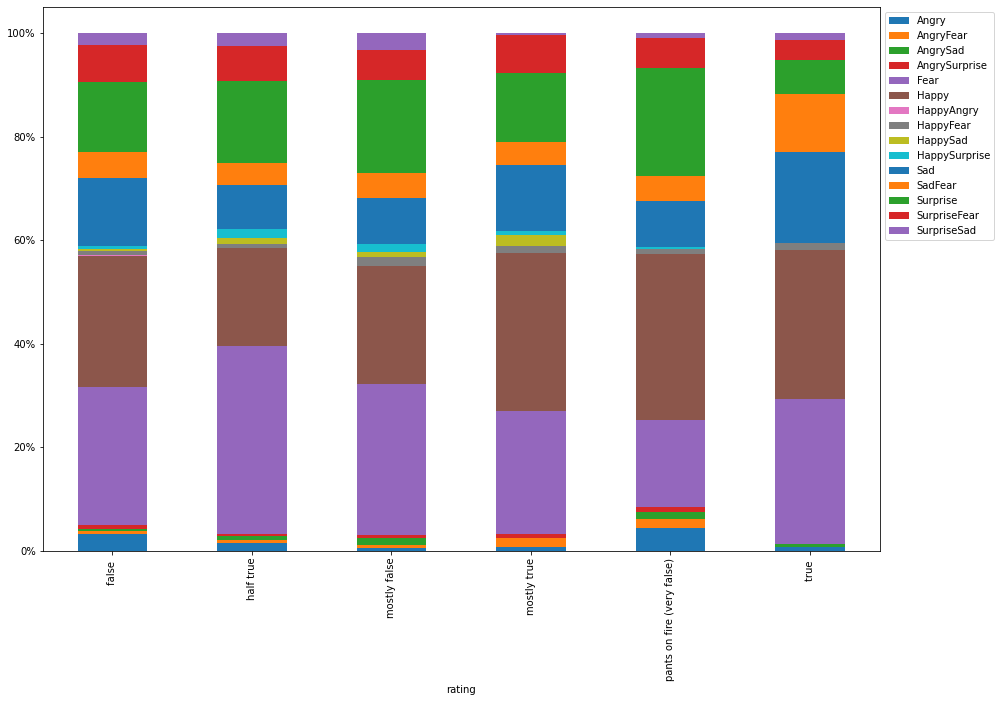

In [ ]:
news_limit.groupby(by = [ 'rating', 'emotions_title_class']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Hatespeech Detection

In [ ]:
news_limit['hate_rumortitle'] = news_limit['rumour-title_clean'].apply(lambda x: sonar.ping(text = x))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-228-9871020ee468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['hate_rumortitle'] = news_limit['rumour-title_clean'].apply(lambda x: sonar.ping(text = x))


In [ ]:
news_limit['hatetitle_rumortitle'] = news_limit['hate_rumortitle'].apply(lambda x: x['top_class'])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-229-39d66c93ec6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['hatetitle_rumortitle'] = news_limit['hate_rumortitle'].apply(lambda x: x['top_class'])


In [ ]:
news_limit['hatetitle_rumortitle'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


neither               1873
offensive_language      16
hate_speech             13
Name: hatetitle_rumortitle, dtype: int64

In [ ]:
news_limit['hate_content'] = news_limit['content_noTags'].apply(lambda x: sonar.ping(text = x))

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-231-e11902d81c6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['hate_content'] = news_limit['content_noTags'].apply(lambda x: sonar.ping(text = x))


In [ ]:
news_limit['hate_content_class'] = news_limit['hate_content'].apply(lambda x: x['top_class'])

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-232-8c67b306b119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['hate_content_class'] = news_limit['hate_content'].apply(lambda x: x['top_class'])


In [ ]:
news_limit['hate_content_class'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


neither               1867
offensive_language      33
hate_speech              2
Name: hate_content_class, dtype: int64

In [ ]:
news_limit['rating'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


false                         640
mostly false                  329
half true                     280
mostly true                   275
pants on fire (very false)    225
true                          153
Name: rating, dtype: int64

In [ ]:
news_limit['rating'].unique()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['false ', 'half true', 'pants on fire (very false)',
       'mostly false', 'mostly true', 'true '], dtype=object)

In [ ]:
true_news = news_limit.loc[news_limit['rating'].isin(['true '])]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='rating', ylabel='count'>

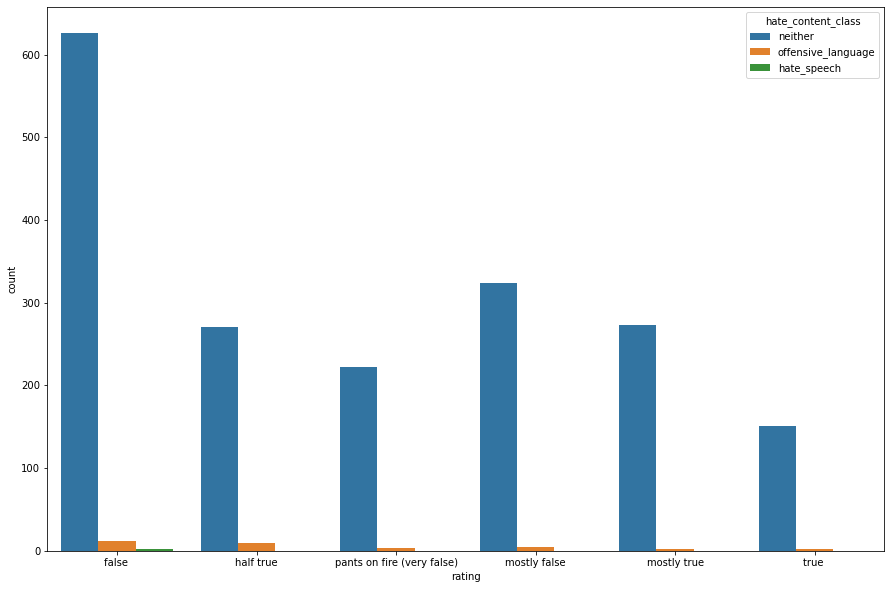

In [ ]:
sns.countplot(data = news_limit, x = 'rating', hue = 'hate_content_class')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


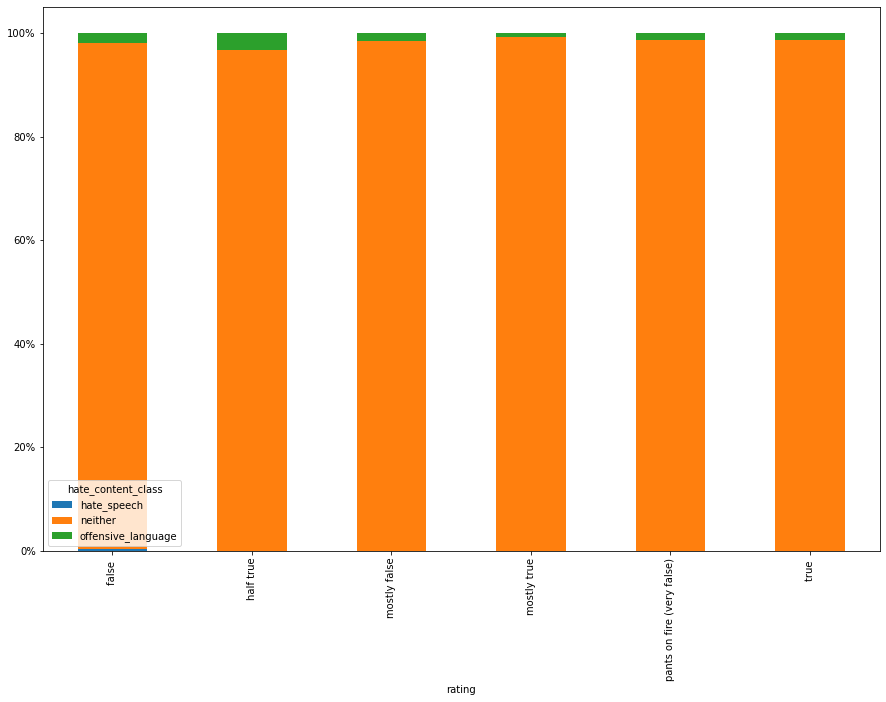

In [ ]:
news_limit.groupby(by = ['rating', 'hate_content_class']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


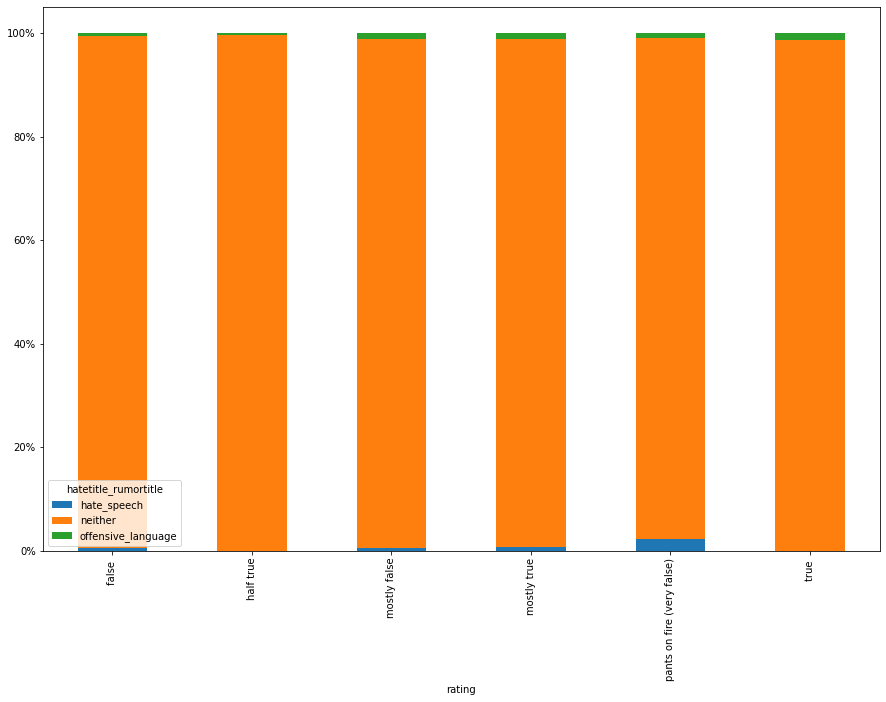

In [ ]:
news_limit.groupby(by = ['rating', 'hatetitle_rumortitle']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
news_limit['hatetitle_rumortitle'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


neither               1873
offensive_language      16
hate_speech             13
Name: hatetitle_rumortitle, dtype: int64

In [ ]:
news_limit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   article-date          1902 non-null   datetime64[ns]
 1   rumour-title          1902 non-null   object        
 2   content               1902 non-null   object        
 3   categories            1902 non-null   object        
 4   rating                1902 non-null   object        
 5   content_noTags        1902 non-null   object        
 6   words_length          1902 non-null   int64         
 7   clean_rumour-title    1902 non-null   object        
 8   rumour-title_tokens   1902 non-null   object        
 9   rumour-title_clean    1902 non-null   object        
 10  urls                  83 non-null     object        
 11  emotions              1902 non-null   object        
 12  emotions_rumortitle   1902 non-null   object        
 13  emotions_title_cla

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
news_limit.loc[news_limit['hatetitle_rumortitle'] == 'offensive_language']['rumour-title'][407]

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'“obesity is like the no 1 factor in whether you really get hit hard by covid-19”'

In [ ]:
news_limit['binary_labels'] = news_limit['rating'].apply(lambda x: 'false' if (x != 'true ') else 'true')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-243-09d685e0b993>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_limit['binary_labels'] = news_limit['rating'].apply(lambda x: 'false' if (x != 'true ') else 'true')


In [ ]:
news_limit['binary_labels'].value_counts()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


false    1749
true      153
Name: binary_labels, dtype: int64

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


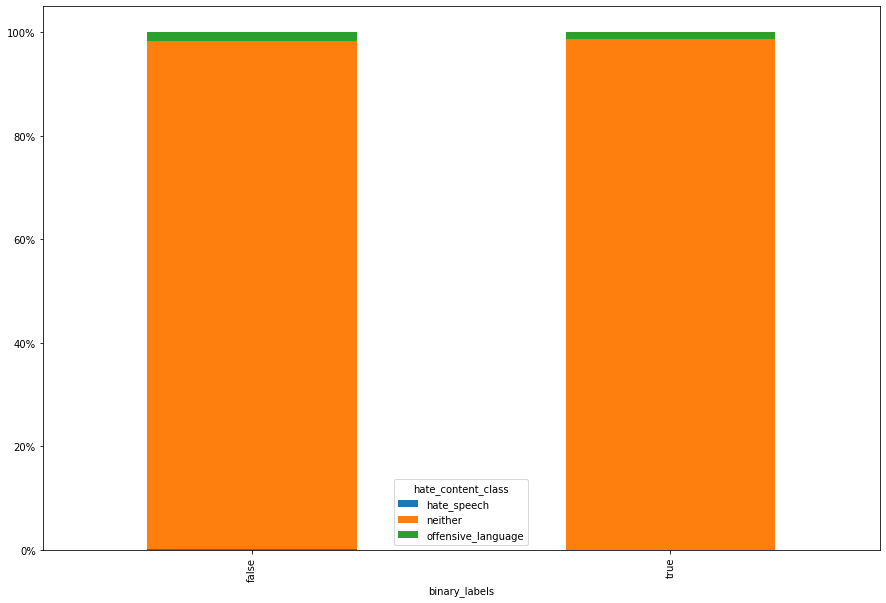

In [ ]:
news_limit.groupby(by = ['binary_labels', 'hate_content_class']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


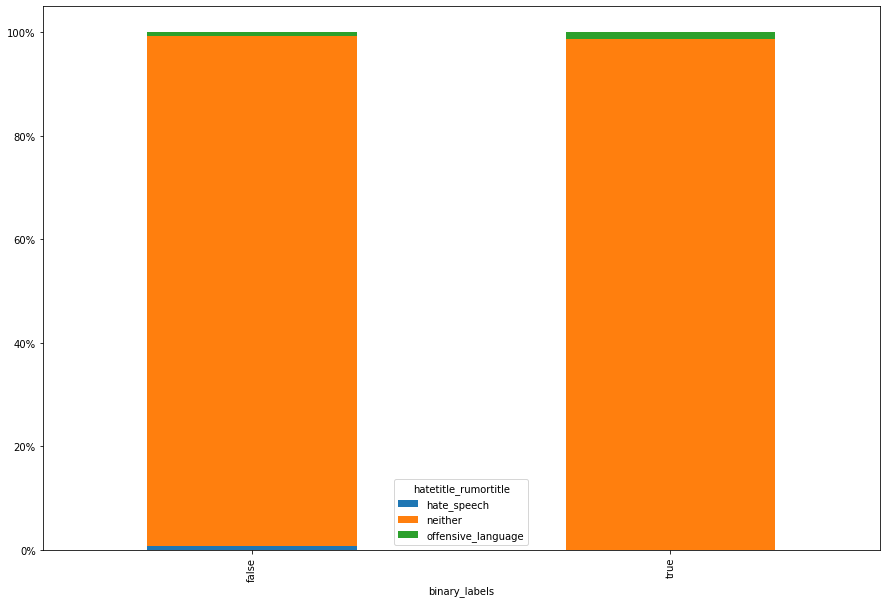

In [ ]:
news_limit.groupby(by = ['binary_labels', 'hatetitle_rumortitle']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='bar',stacked=True)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [ ]:
news_limit.to_csv('Politifact_descriptive.csv')

C:\Users\shakshi\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
